In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv("../data/raw/train.csv")

In [7]:
df_test = pd.read_csv("../data/raw/test.csv")


In [8]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
'''
 0   Tipo de cliente                      
 1   Edad                               
 2   Tipo de viaje                     
 3   Clase                              
 4   Distancia del vuelo                    
 5   Servicio wifi a bordo            
 6   Horario de salida/llegada conveniente    
 7   Facilidad para reservar online             
 8   Ubicación de la puerta de embarque                    
 9   Comida y bebida                     
 10  Embarque online                   
 11  Comodidad del asiento                     
 12  Entretenimiento a bordo            
 13  Servicio a bordo                    
 14  Servicio de espacio para las piernas                     
 15  Gestión del equipaje                   
 16  Servicio de facturación                   
 17  Servicio a bordo                    
 18  Limpieza                         
 19  Retraso en la llegada en minutos           
 20  Satisfacción  "Rating" --> Target           
 21  Tipo de cliente_Cliente fiel        
 22  Tipo de cliente_Cliente no fiel    
'''

'\n 0   Tipo de cliente                      \n 1   Edad                               \n 2   Tipo de viaje                     \n 3   Clase                              \n 4   Distancia del vuelo                    \n 5   Servicio wifi a bordo            \n 6   Horario de salida/llegada conveniente    \n 7   Facilidad para reservar online             \n 8   Ubicación de la puerta de embarque                    \n 9   Comida y bebida                     \n 10  Embarque online                   \n 11  Comodidad del asiento                     \n 12  Entretenimiento a bordo            \n 13  Servicio a bordo                    \n 14  Servicio de espacio para las piernas                     \n 15  Gestión del equipaje                   \n 16  Servicio de facturación                   \n 17  Servicio a bordo                    \n 18  Limpieza                         \n 19  Retraso en la llegada en minutos           \n 20  Satisfacción  "Rating" --> Target           \n 21  Tipo de cliente_C

In [11]:
mapa_satisfaccion = {'neutral or dissatisfied': 0, 'satisfied': 1}
mapa_clase = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
mapa_viaje = {'Personal Travel': 0, 'Business travel': 1}

In [12]:
for dataset in [df, df_test]:
    # Limpieza de espacios (solo si es texto)
    # Convertimos a números usando map
    dataset['satisfaction'] = dataset['satisfaction'].astype(str).str.strip().map(mapa_satisfaccion)
    dataset['Class'] = dataset['Class'].astype(str).str.strip().map(mapa_clase)
    dataset['Type of Travel'] = dataset['Type of Travel'].astype(str).str.strip().map(mapa_viaje)

In [13]:
df = df.drop(columns=['Unnamed: 0','id','Departure Delay in Minutes','Customer Type','Gate location'])
df_test = df_test.drop(columns=['Unnamed: 0','id','Departure Delay in Minutes','Customer Type','Gate location'])

In [14]:
le = LabelEncoder()

In [15]:
df['Gender'] = le.fit_transform(df['Gender'])

In [16]:
print("Valores únicos en Class:", df['Class'].unique())  # Debería salir [1 2 0] o similar, NO nan
df.info()

Valores únicos en Class: [1 2 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Age                                103904 non-null  int64  
 2   Type of Travel                     103904 non-null  int64  
 3   Class                              103904 non-null  int64  
 4   Flight Distance                    103904 non-null  int64  
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  int64  
 8   Food and drink                     103904 non-null  int64  
 9   Online boarding                    103904 non-null  int64  
 10  Seat comfort                       103904 non-null  int64  
 11  Inflig

In [17]:
df

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,13,0,1,460,3,4,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,1,25,1,2,235,3,2,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,0,26,1,2,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,0,25,1,2,562,2,5,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,1,61,1,2,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,23,1,0,192,2,1,2,2,2,2,2,3,1,4,2,3,2,0.0,0
103900,1,49,1,2,2347,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1
103901,1,30,1,2,1995,1,1,1,4,1,5,4,3,2,4,5,5,4,14.0,0
103902,0,22,1,0,1000,1,1,1,1,1,1,1,4,5,1,5,4,1,0.0,0


In [18]:
'''
 0   Tipo de cliente                      
 1   Edad                               
 2   Tipo de viaje                     
 3   Clase                              
 4   Distancia del vuelo                    
 5   Servicio wifi a bordo            
 6   Horario de salida/llegada conveniente    
 7   Facilidad para reservar online             
 8   Ubicación de la puerta de embarque                    
 9   Comida y bebida                     
 10  Embarque online                   
 11  Comodidad del asiento                     
 12  Entretenimiento a bordo            
 13  Servicio a bordo                    
 14  Servicio de espacio para las piernas                     
 15  Gestión del equipaje                   
 16  Servicio de facturación                   
 17  Servicio a bordo                    
 18  Limpieza                         
 19  Retraso en la llegada en minutos           
 20  Satisfacción  "Rating" --> Target           
 21  Tipo de cliente_Cliente fiel        
 22  Tipo de cliente_Cliente no fiel    
'''

'\n 0   Tipo de cliente                      \n 1   Edad                               \n 2   Tipo de viaje                     \n 3   Clase                              \n 4   Distancia del vuelo                    \n 5   Servicio wifi a bordo            \n 6   Horario de salida/llegada conveniente    \n 7   Facilidad para reservar online             \n 8   Ubicación de la puerta de embarque                    \n 9   Comida y bebida                     \n 10  Embarque online                   \n 11  Comodidad del asiento                     \n 12  Entretenimiento a bordo            \n 13  Servicio a bordo                    \n 14  Servicio de espacio para las piernas                     \n 15  Gestión del equipaje                   \n 16  Servicio de facturación                   \n 17  Servicio a bordo                    \n 18  Limpieza                         \n 19  Retraso en la llegada en minutos           \n 20  Satisfacción  "Rating" --> Target           \n 21  Tipo de cliente_C

In [19]:
df_test.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Female,52,1,0,160,5,4,3,3,4,3,5,5,5,5,2,5,5,44.0,1
1,Female,36,1,2,2863,1,1,3,5,4,5,4,4,4,4,3,4,5,0.0,1
2,Male,20,1,0,192,2,0,2,2,2,2,2,4,1,3,2,2,2,0.0,0
3,Male,44,1,2,3377,0,0,0,3,4,4,1,1,1,1,3,1,4,6.0,1
4,Female,49,1,0,1182,2,3,4,4,1,2,2,2,2,2,4,2,4,20.0,1


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Age                                25976 non-null  int64  
 2   Type of Travel                     25976 non-null  int64  
 3   Class                              25976 non-null  int64  
 4   Flight Distance                    25976 non-null  int64  
 5   Inflight wifi service              25976 non-null  int64  
 6   Departure/Arrival time convenient  25976 non-null  int64  
 7   Ease of Online booking             25976 non-null  int64  
 8   Food and drink                     25976 non-null  int64  
 9   Online boarding                    25976 non-null  int64  
 10  Seat comfort                       25976 non-null  int64  
 11  Inflight entertainment             25976 non-null  int

In [21]:
df['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

In [22]:
df.describe()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,0.492541,39.379706,0.689627,1.028103,1189.448375,2.729683,3.060296,2.756901,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,15.178678,0.433333
std,0.499947,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.698682,0.495538
min,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,40.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,1.000000
max,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1584.000000,1.000000


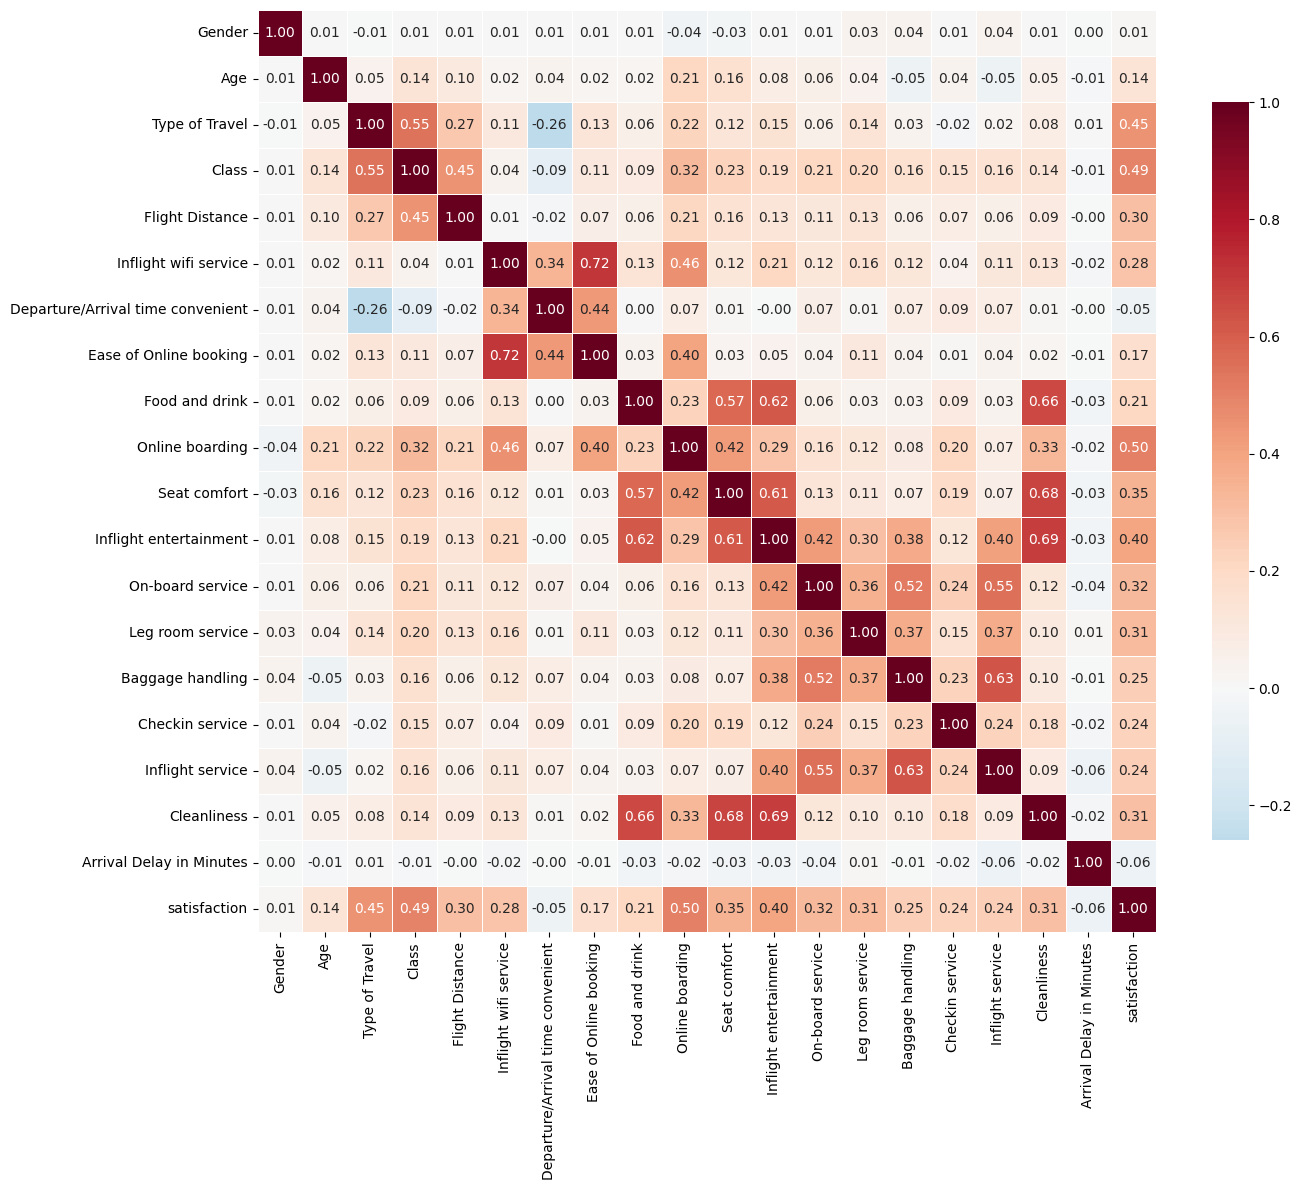

In [24]:
corr_matrix = df.corr(numeric_only=True)


# Configuración del Gráfico 

plt.figure(figsize=(14, 12))

# Creamos el heatmap con argumentos específicos para mejorar la visualización
sns.heatmap(
    corr_matrix,
    annot=True,       
    fmt=".2f",      
    cmap="RdBu_r",  
    center=0,       
    linewidths=0.5,   
    cbar_kws={"shrink": .8}) 
    

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [28]:
df

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,13,0,1,460,3,4,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,1,25,1,2,235,3,2,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,0,26,1,2,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,0,25,1,2,562,2,5,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,1,61,1,2,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,23,1,0,192,2,1,2,2,2,2,2,3,1,4,2,3,2,0.0,0
103900,1,49,1,2,2347,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1
103901,1,30,1,2,1995,1,1,1,4,1,5,4,3,2,4,5,5,4,14.0,0
103902,0,22,1,0,1000,1,1,1,1,1,1,1,4,5,1,5,4,1,0.0,0


In [29]:
# 1. Imputar valores nulos en 'Arrival Delay in Minutes' (rellenar con la media o 0)
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean())

# 2. Definir X e y (Features y Target)
# Asegúrate de que las columnas en X sean exactamente las mismas en train y test
X_train = df.drop('satisfaction', axis=1)
y_train = df['satisfaction']

X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']

# Verificación rápida
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (103904, 19)
Test shape: (25976, 19)
